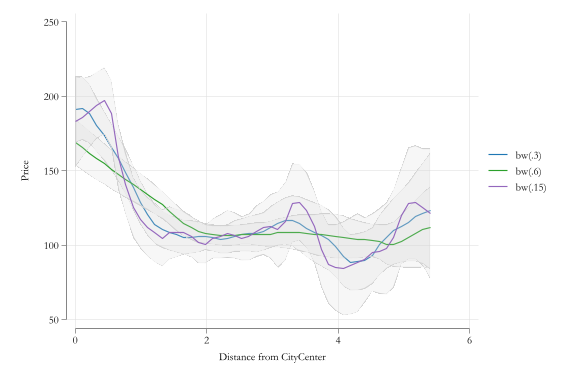

In [2]:
*| echo: true
*| code-fold: true
*| fig-align: center
set scheme white2
color_style tableau
use data_slides/hotels-vienna.dta, clear
qui:drop if distance>6
two (lpolyci price distance, bw(.3) fcolor(%20)) ///
(lpolyci price distance, bw(.6) fcolor(%20)) ///
(lpolyci price distance, bw(.15) fcolor(%20)), ///
legend(order(2 "bw(.3)" 4 "bw(.6)" 6 "bw(.15)")) ///
ytitle("Price") xtitle("Distance from CityCenter")

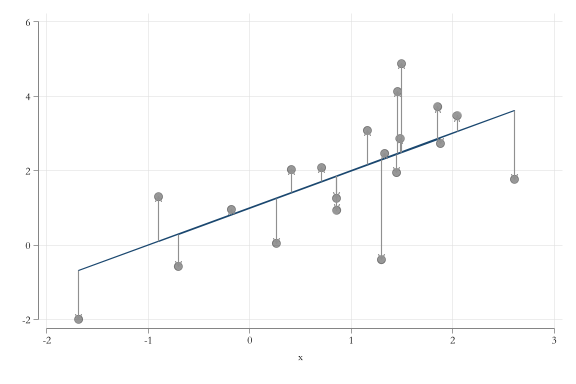

In [3]:
*| echo: true
*| code-fold: true
*| fig-align: center
clear 
qui:set obs 20
qui:gen x = rnormal()+1
qui:gen y = 1+x+rnormal()
qui:gen yh=1+x
two (scatter y x, msize(3) mcolor(gs3%50)) ///
   (line yh x, color(navy)) (pcarrow yh x y x, color(gs9)), ///
legend(off)

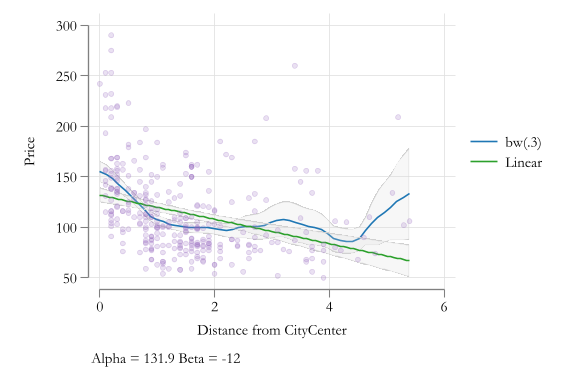

In [4]:
*| echo: true
*| code-fold: true
*| fig-align: center
 
use data_slides/hotels-vienna.dta, clear
qui:drop if distance>6
qui: keep if inrange(stars,3,4)
qui: drop if price>300
two (lpolyci price distance, bw(.3) fcolor(%20)) ///
(lfitci price distance, fcolor(%20)) ///
(scatter price distance, color(%20)), ///
legend(order(2 "bw(.3)" 4 "Linear" )) ///
ytitle("Price") xtitle("Distance from CityCenter") ///
scale(1.4) note(Alpha = 131.9 Beta = -12)

In [5]:
*| echo: true
*| code-fold: true
qui:drop2 pr_hat res
qui:reg price distance
qui:predict pr_hat
qui:predict res, res
qui:sort res
list hotel_id price distance pr_hat res star in 1/5

variable pr_hat not found
variable res not found

     +------------------------------------------------------------+
     | hotel_id   price   distance     pr_hat         res   stars |
     |------------------------------------------------------------|
  1. |    22080      54        1.1   118.6571   -64.65714       3 |
  2. |    22122      59         .8   122.2709    -63.2709       3 |
  3. |    21912      60        1.1   118.6571   -58.65714       4 |
  4. |    22073      59        1.2   117.4525   -58.45255       3 |
  5. |    22127      58        1.4   115.0434   -57.04337     3.5 |
     +------------------------------------------------------------+


In [6]:
*| echo: true
*| output: asis
qui {
  set linesize 255
  capture gen log_price = log(price)
  capture gen log_distance = log(distance)
  regress price distance
  est sto m1
  regress log_price distance
  est sto m2
  regress price log_distance
  est sto m3
  regress log_price log_distance
  est sto m4
}
esttab m1 m2 m3 m4, se md nostar nonumber note("")



|              |        price |    log\_price |        price |    log\_price |
| ------------ | :----------: | :----------: | :----------: | :----------: |
| distance     |       -12.05 |       -0.104 |              |              |
|              |      (2.001) |     (0.0161) |              |              |


| log\_distance |              |              |       -21.28 |       -0.176 |
|              |              |              |      (2.251) |     (0.0183) |
| \_cons       |        131.9 |        4.829 |        114.8 |        4.682 |
|              |      (3.740) |     (0.0301) |      (2.087) |     (0.0169) |
| *N*          |          321 |          321 |          320 |          320 |





In [7]:
*| echo: true
*| code-fold: false
*| output: false
*              v Knot  v knot2
mkspline dist1 1 dist2 2 dist3= distance  

In [8]:
*| echo: true
*| code-fold: 

regress price dist1 dist2 dist3


      Source |       SS           df       MS      Number of obs   =       321
-------------+----------------------------------   F(3, 317)       =     41.08
       Model |  162850.558         3  54283.5192   Prob > F        =    0.0000
    Residual |  418846.994       317  1321.28389   R-squared       =    0.2800
-------------+----------------------------------   Adj R-squared   =    0.2731
       Total |  581697.551       320  1817.80485   Root MSE        =    36.349



------------------------------------------------------------------------------


       price | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]


-------------+----------------------------------------------------------------
       dist1 |

  -75.91485   8.747817    -8.68   0.000    -93.12596   -58.70373
       dist2 |  -.1596926   7.344118    -0.02   0.983    -14.60907    14.28968
       dist3 |    2.54916   3.843377     0.66   0.508     -5.01259    10.11091
       _cons |   174.5939   6.098417    28.63   0.000     162.5954    186.5924


------------------------------------------------------------------------------
